In [3]:
from PIL import Image
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
m=input("please choose the person:  ")
n=input("please choose the picture, n> 5:  ")



please choose the person:  1
please choose the picture, n> 5:  8


You choosed this person:


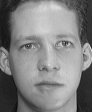

In [5]:
my_str= "orlfaces/s{}/{}.pgm".format(m,n)
my_pic5=Image.open(my_str)
print("You choosed this person:")
my_pic5

In [6]:
selected_image= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
selected_image_normalize = cv.normalize(selected_image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
selected_image_normalize=np.reshape(selected_image_normalize,(10304,))
selected_image_normalize.shape
selected_image_normalize=selected_image_normalize-selected_image_normalize.mean()

In [7]:
TRAIN=np.zeros((10304,200))
for i in range(1,41,1):
    for j in range(1,6,1):
        my_str= "orlfaces/s{}/{}.pgm".format(i,j)
        img= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
        out = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
        x=np.array(out)
        y=np.reshape(x,(10304,))
        TRAIN[:,(i-1)*5+(j-1)]=y
        

In [8]:
TRAIN_mean=np.reshape(TRAIN.mean(0),(200,1))
ones_vector=np.ones((10304,1))
TRAIN_mean_zero=TRAIN-np.matmul(ones_vector,TRAIN_mean.T)


In [9]:
from scipy.linalg import svd
U, s, VT = svd(TRAIN_mean_zero)

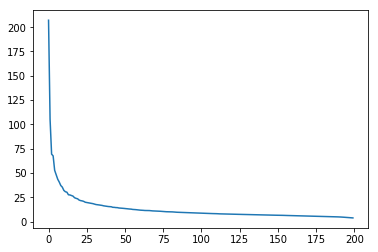

In [10]:
plt.plot(s)


In [11]:
TEST=np.zeros((10304,200))
for i in range(1,41,1):
    for j in range(6,11,1):
        my_str= "orlfaces/s{}/{}.pgm".format(i,j)
        img= cv.imread(my_str, cv.IMREAD_GRAYSCALE)
        out = cv.normalize(img.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
        x=np.array(out)
        y=np.reshape(x,(10304,))
        TEST[:,(i-1)*5+(j-6)]=y
        

In [12]:

TEST_mean=np.reshape(TEST.mean(0),(200,1))
TEST_mean_zero=TRAIN-np.matmul(ones_vector,TEST_mean.T)
projected_TEST= np.matmul(TEST_mean_zero.T,U[:,0:20])
projected_TEST.shape

(200, 20)

In [13]:
projected_selected_image=np.matmul(selected_image_normalize,U[:,0:20])
selected_image_normalize.shape

(10304,)

In [14]:

def minIndex(A):
    mi = 0
    for i in range(len(A)):
        if A[i] < A[mi]:
            mi = i
    return mi

In [15]:
L=np.zeros((200,1))
for i in range(200):
    dist_vector=projected_selected_image-projected_TEST[i,:]
    L[i]=math.sqrt(np.matmul(dist_vector.T,dist_vector))


this picture is recognized:


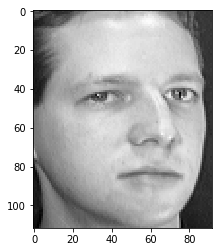

In [16]:
zzz=TRAIN[:, minIndex(L)]
zzzz=np.reshape(zzz,(112, 92))
zzzz
zx=zzzz*255
print("this picture is recognized:")
plt.imshow(zx, cmap='gray', vmin=0, vmax=255)